## Part 3: PreProcessing and Modelling

In [1]:
## We start by importing the appropriate packages which we will want to use. 
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
## We Load and preview our customer_cltv dataframe from the previouse chapter 
customer_cltv = pd.read_csv('.\..\cleaned_data.csv',index_col=0)
customer_cltv.head()

,CustomerID,pfw_spent,fw_nb_orders,fw_nb_items,fw_total_spent,fw_used_coupon,first_order_month,fw_purchased_accessory,first_item_size,accepts_marketing,wealthy_zip,region,first_item_price_range
0,Anonymous13455,1257.80,1,1,50.0,0,6,0,M,0,0,MW,high
1,Anonymous2142,436.15,1,1,48.0,0,5,0,L,0,0,NE,high
2,Anonymous4843,1052.75,2,2,96.0,0,10,0,S,1,0,W,high
3,Anonymous11225,728.10,1,1,16.0,0,1,1,No size,0,0,MW,low
4,Anonymous540,1114.75,1,1,50.0,0,1,0,XS,0,0,W,high


## Preprocessing: 

In [3]:
## We start by creating dummy variables for our categorical variables.
dummies_encoded = pd.get_dummies(customer_cltv[['first_item_size','region','first_item_price_range','first_order_month']],drop_first=True)
customer_cltv = pd.concat([customer_cltv,dummies_encoded], axis =1)
customer_cltv = customer_cltv[customer_cltv.loc[:,'fw_total_spent'] > 0]
customer_cltv.drop(columns=['first_item_size','region','first_item_price_range'],inplace = True)
customer_cltv.head(2)

,CustomerID,pfw_spent,fw_nb_orders,fw_nb_items,fw_total_spent,fw_used_coupon,first_order_month,fw_purchased_accessory,accepts_marketing,wealthy_zip,first_order_month,first_item_size_M,first_item_size_No size,first_item_size_S,first_item_size_XL,first_item_size_XS,region_NE,region_S,region_W,first_item_price_range_low,first_item_price_range_medium
0,Anonymous13455,1257.80,1,1,50.0,0,6,0,0,0,6,1,0,0,0,0,0,0,0,0,0
1,Anonymous2142,436.15,1,1,48.0,0,5,0,0,0,5,0,0,0,0,0,1,0,0,0,0


In [4]:
## We get our feature variables and target variables
X = customer_cltv.drop(columns=['CustomerID','pfw_spent','first_order_month'])
y = customer_cltv['pfw_spent']
print(X.shape, y.shape)

(10590, 17) (10590,)


In [5]:
## We use a scaler to scale the feature variables: 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [10]:
## We split our data into training and test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(7942, 17) (2648, 17) (7942,) (2648,)


## I. Linear Models: 
- Lasso Regression
- Ridge Regression
- Elastic Net
- Decision Trees
- Random Forest
- GBM
- Light GBM
- XGboost
- Adaboost
- Neural Networks

## Multiple Linear Regression

In [11]:
## We instantiate the linear Regression model and fit to the training data. 
from sklearn.linear_model import LinearRegression
rModel = linear_model.LinearRegression(normalize = True)
rModel.fit(X_train_scaled, y_train)

LinearRegression(normalize=True)

In [12]:
## We check R squared. 
print(rModel.score(X_train_scaled,y_train))

0.04438320042026378


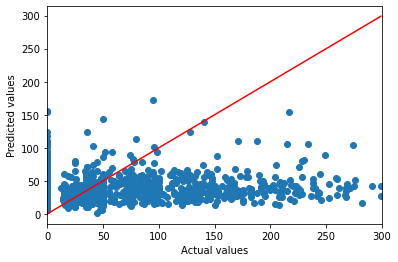

In [13]:
## We visualize the Actual values vs the predicted values. 
y_pred = rModel.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([x for x in range(0,300)],[x for x in range(0,300)], color='r')
plt.xlim(0,300)
plt.show()

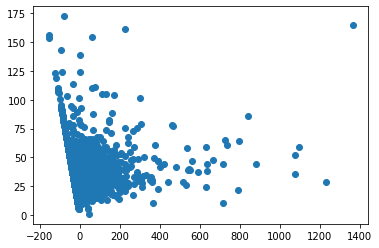

In [14]:
## Plotting Residuals
residuals = y_test - y_pred
plt.scatter(residuals,y_pred)
plt.show()

## Decision Tree Regressor:

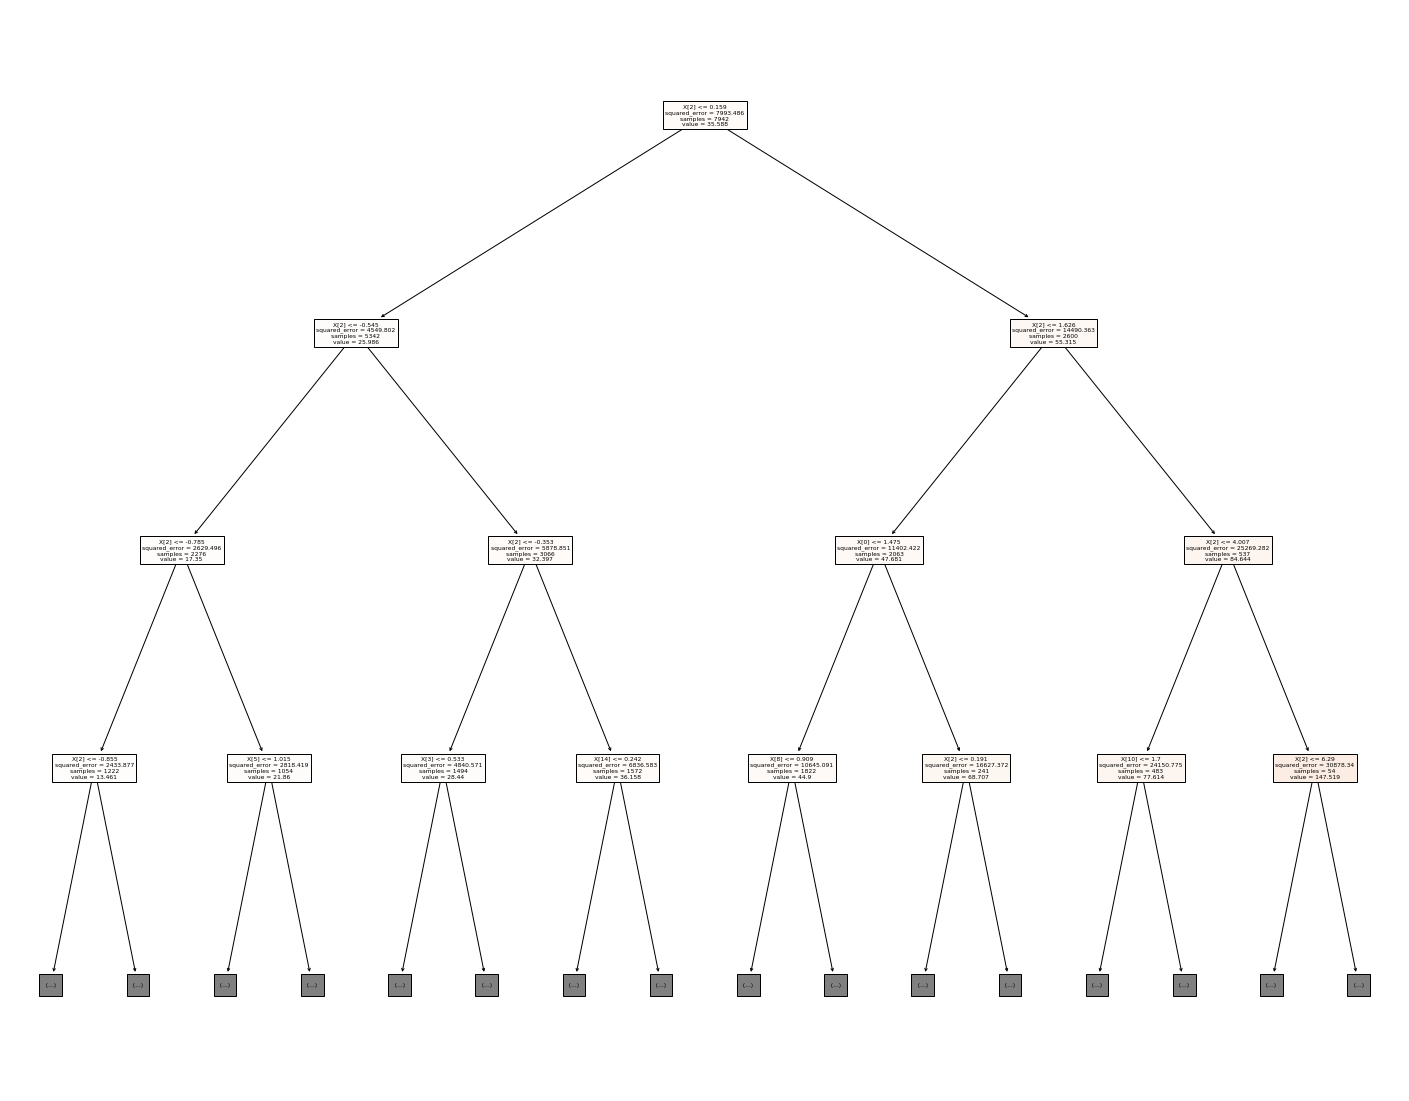

In [24]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
DT = DecisionTreeRegressor()
DT.fit(X_train_scaled,y_train)
y_pred = DT.predict(X_test_scaled)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(DT,max_depth =3, filled = True)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFG = RandomForestRegressor()   #(n_estimators = 100, #max_depth = 10)
RFG.fit(X_train_scaled,y_train)

In [ ]:
y_pred = RFG.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([x for x in range(0,300)],[x for x in range(0,300)], color='r')
plt.xlim(0,300)
plt.show()

## 2. Classification Models
- In the previous models, our target feature was **continuous**. We will be t

In [ ]:
customer_cltv[customer_cltv['pfw_spent'] > 0]['pfw_spent'].count() / customer_cltv['pfw_spent'].count()

In [ ]:
customer_cltv2 = customer_cltv
customer_cltv2['pwf_order?'] = np.where(customer_cltv2['pfw_spent'] > 0,1,0)
customer_cltv2['Spender_Type'] = np.where(customer_cltv2['pfw_spent'] == 0,'No spend',
                                 np.where((customer_cltv2['pfw_spent'] > 0) & (customer_cltv2['pfw_spent'] < 50),
                                 'Small Returning', 'Large_Returning'))

customer_cltv2.head()

In [ ]:
customer_cltv2['pwf_order?'].describe()

In [ ]:
customer_cltv2 = customer_cltv2.drop(columns='Spender_Type')

In [ ]:
customer_cltv2

In [ ]:
X = customer_cltv2.drop(columns=['CustomerID','pfw_spent','pwf_order?','fw_nb_orders','fw_purchased_accessory'])
y = customer_cltv2['pwf_order?']

In [ ]:
X.head()

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size =0.25, random_state =246)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion ='entropy', max_depth = 5, random_state=1234)

# Call fit() on entr_model
entr_model.fit(X_train, y_train) 

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

In [ ]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["No", "Yes"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
## We can plot a confusion matrix
plot_confusion_matrix(entr_model,X_test,y_test, display_labels=['No','Yes'])
plt.show()

In [ ]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

## Random Forests:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth =9, random_state = 1234)

# Model and fit
firstRFModel.fit(X_train,y_train)
y_pred = firstRFModel.predict(X_test)
y_pred = pd.Series(y_pred)

# Metrics 
print("RF model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

plot_confusion_matrix(firstRFModel,X_test,y_test, display_labels=['No','Yes'])
plt.show()